**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [4]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
s = json.load(open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json"))
pl.rcParams.update(s)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [127]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [204]:
x = np.linspace(0, 100, 10)
y = line(0.7, x, 0, errors)

Text(0.5,0,'exogenous')

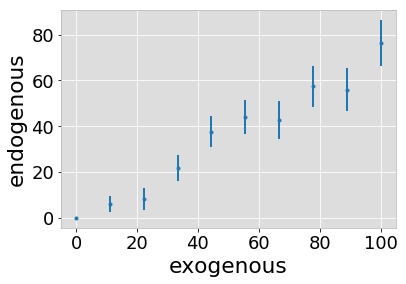

In [223]:
pl.errorbar(x, y, errors(x),  fmt='.')
pl.ylabel("endogenous")
pl.xlabel("exogenous")

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [206]:
x

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [207]:
y

array([  0.        ,   6.1011771 ,   8.17001554,  21.66760266,
        37.70270272,  44.19291138,  42.72409207,  57.36055458,
        55.98791202,  76.26589299])

In [208]:
X = sm.add_constant(x)

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [209]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     697.0
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           7.76e-10
Time:                        19:39:19   Log-Likelihood:                -29.859
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       9   BIC:                             62.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7110      0.027     26.400      0.000         0.650     0.772
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.745
Skew:                          -0.087   Prob(JB):                        0.689
Kurtosis:                       1.674   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
#THE RIGHT WAY
smfit1 = smf.OLS(y, X ).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           5.93e-07
Time:                        19:39:21   Log-Likelihood:                -29.643
No. Observations:                  10   AIC:                             63.29
Df Residuals:                       8   BIC:                             63.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.8340      3.082     -0.595      0.568        -8.940     5.272
x1             0.7370      0.052     14.187      0.000         0.617     0.857
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.702
Skew:                          -0.262   Prob(JB):                        0.704
Kurtosis:                       1.813   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

In [211]:
b0, b1 =smfit1.params

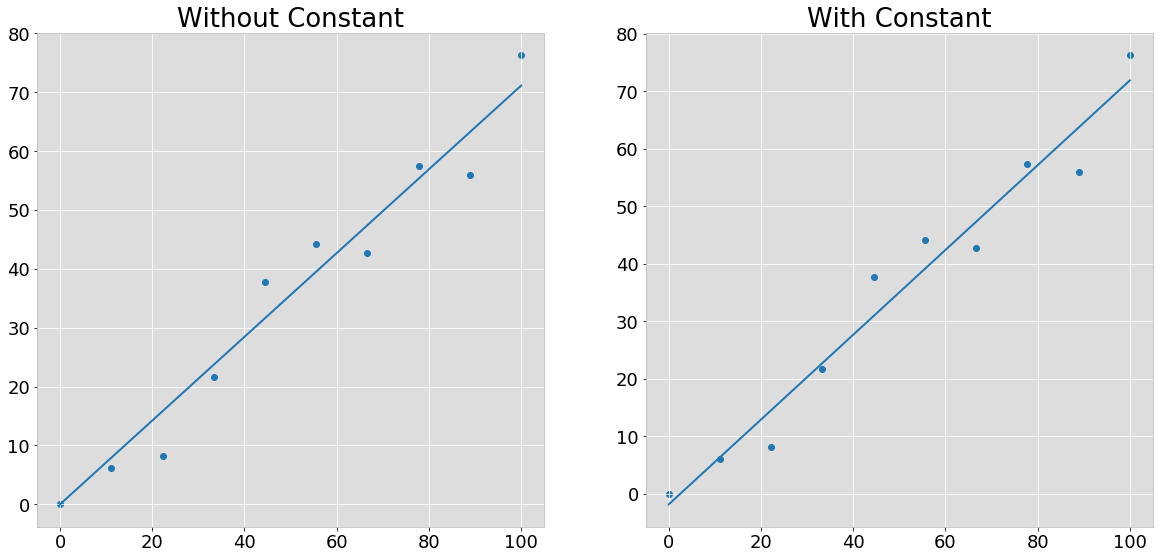

In [241]:
fig = pl.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax.scatter(x, y)
ax.set_title("Without Constant")
ax.plot(x, smfit.predict(x))


ax2 = fig.add_subplot(222)
ax2.scatter(x, y)
ax2.set_title("With Constant")
ax2.plot(x, x*b1+b0)


# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,0,'exogenous')

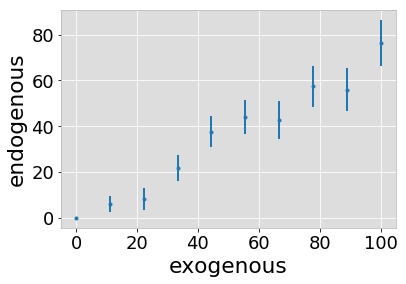

In [235]:
x1 = np.linspace(0, 100, 10)
y1 = line(0.7, x, 75, errors)

pl.errorbar(x1, y, errors(x1),  fmt='.')
pl.ylabel("endogenous")
pl.xlabel("exogenous")

# 6. repeat step 3

In [226]:
smfit2 = smf.OLS(y1, x1).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     61.53
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           2.59e-05
Time:                        19:43:28   Log-Likelihood:                -51.162
No. Observations:                  10   AIC:                             104.3
Df Residuals:                       9   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7781      0.227      7.844      0.000         1.265     2.291
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.686
Skew:                           0.058   Prob(JB):                        0.710
Kurtosis:                       1.722   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
smfit3 = smf.OLS(y1, sm.add_constant(x1)).fit()
smfit3.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     689.4
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           4.76e-09
Time:                        19:44:07   Log-Likelihood:                -23.178
No. Observations:                  10   AIC:                             50.36
Df Residuals:                       8   BIC:                             50.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         74.8329      1.614     46.352      0.000        71.110    78.556
x1             0.7146      0.027     26.257      0.000         0.652     0.777
==============================================================================
Omnibus:                        1.305   Durbin-Watson:                   2.553
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                0.640
Skew:                          -0.594   Prob(JB):                        0.726
Kurtosis:                       2.643   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [242]:
sm.WLS(y1, x1, weights= 1/errors(y1) ).fit().summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            WLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     48.18
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           6.75e-05
Time:                        23:15:09   Log-Likelihood:                -51.996
No. Observations:                  10   AIC:                             106.0
Df Residuals:                       9   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7849      0.257      6.941      0.000         1.203     2.367
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.576
Skew:                          -0.014   Prob(JB):                        0.750
Kurtosis:                       1.824   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

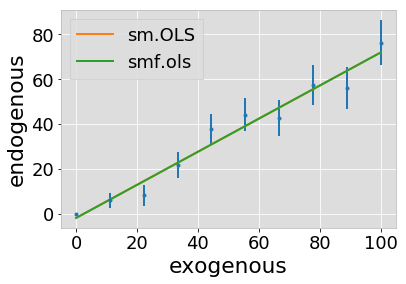

In [240]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit1.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();